In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'INTC'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,INTC
Date,
2022-12-01 00:00:00-05:00,26.43
2023-01-01 00:00:00-05:00,28.26
2023-02-01 00:00:00-05:00,30.32


change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,INTC
Date_index,
1998-01-01,11.890116
1998-02-01,13.170357
1998-03-01,11.463264


key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,15.349075,1.950828,3.756816,-2.290896,6.898247,24.689143,16.50779,24.689143,10.236368,115681280000,146588280000,14.434899,1.834638,7.495709,-12.292135,1.140582,1.140582,2.324805,7.046497,9.498366,-15.57627,0.069277,-0.081353,0.371553,0.443046,1.485699,1.567626,None,1.925755,0.051841,0.748315,0,0.277984,0.18456,-1.609797,-0.394011,-1.905946,0.049608,32.919537,0.015565,0.053969,-10.377373,18252000000,67814000000,-30273000000,0.41461,6795000000,7671000000,12000000000,23.924652,96.777247,133.380126,15.25623,3.771548,2.73654,0.079016,-6.047712
2021,FY,19.468835,4.894802,7.388766,2.380389,7,23.501109,15.067258,23.501109,9.533875,210824454317.400024,244098454317.400024,10.611257,2.667853,7.029591,21.81996,2.210108,2.210108,3.088915,7.159992,8.139057,25.263761,0.09424,0.04583,0.351291,0.433565,0.976006,2.101741,32.589615,1.509513,0.026771,0.284075,0.082798,0.19222,0.203277,-0.677837,-0.257251,-1.723965,0.025764,50.874832,0.138041,0.148077,-7.913587,30256000000,61158000000,-15297000000,0.399419,9457000000,5747000000,10776000000,43.680464,59.577239,111.71121,8.356138,6.126501,3.267353,0.20828,-5.008376
2020,FY,18.544177,4.977137,8.426768,4.984758,5.690641,19.299357,10.726602,19.299357,8.818766,232792554121.400024,263328554121.400024,11.138933,2.989618,6.579034,11.121903,2.872634,2.872634,3.381773,6.93956,7.442023,12.580792,0.089775,0.089913,0.418285,0.470655,0.804723,1.908742,37.643879,1.693095,0.023918,0.266424,0,0.174092,0.235135,-0.408461,-0.185611,-1.180897,0.02381,46.489245,0.184499,0.178481,-9.254108,22495000000,45041000000,-24804000000,0.449184,8119500000,5664000000,9601500000,31.790489,59.467669,89.792877,11.481421,6.137789,4.06491,0.257891,-3.44201


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [11]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [12]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [13]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

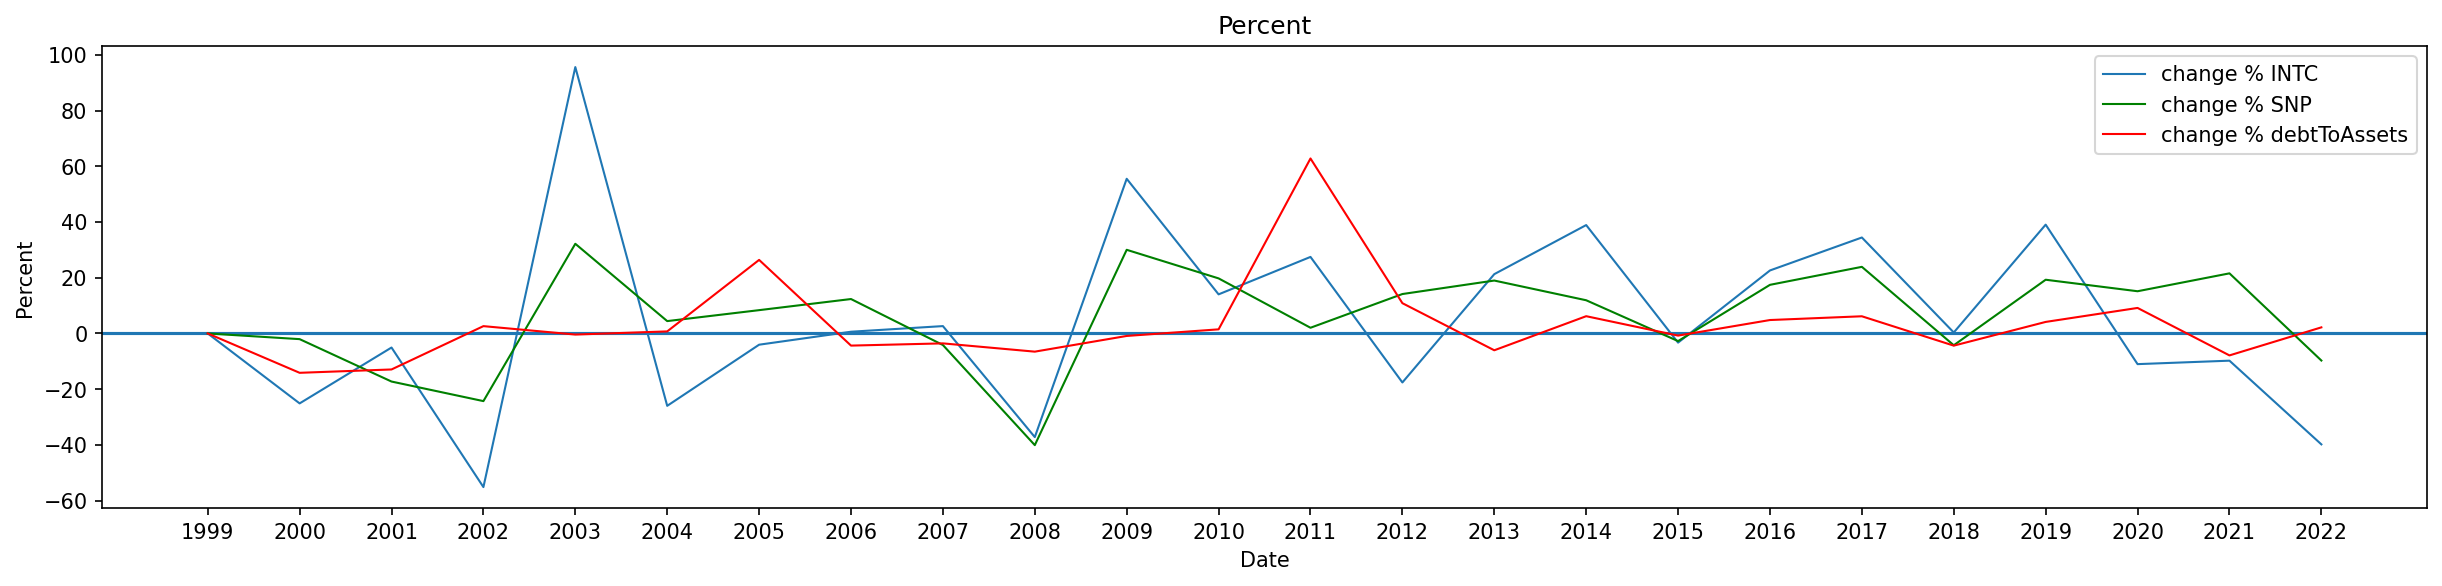

In [14]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()

In [16]:
df_with_changes_key['change % INTC']

1999     0.000000
2000   -25.108620
2001    -5.053554
2002   -55.148351
2003    95.617981
2004   -25.982316
2005    -4.037794
2006     0.620248
2007     2.638863
2008   -37.196006
2009    55.519805
2010    14.032220
2011    27.474091
2012   -17.596366
2013    21.288339
2014    38.905941
2015    -3.288922
2016    22.613593
2017    34.444969
2018     0.344302
2019    39.059641
2020   -11.011632
2021    -9.771403
2022   -39.816371
Name: change % INTC, dtype: float64